# UTS DATA MINING
- NAMA : RIFKY BINTANG PRADANA
- NIM : A11.2O22.14038
- KELP : A11.4502

TERKAIT DATASET : https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators

LINK YOUTUBE :

### Load Gdrive

In [ ]:
folder_name = "/content/drive/My Drive/Colab Notebooks/"

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

import sys
sys.path.append(f'{folder_name}')

Mounted at /content/drive


### Load Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

### Load Dataset

In [ ]:
# Baca dataset
#url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"

column_names = ['ID', 'Diabetes_binary', 'HighBP' ,'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']
#df = pd.read_csv(url, names=column_names, skipinitialspace=True, na_values="?")

# bisa juga dari folder google drive
df =pd.read_csv(f'{folder_name}/diabetes_012_health_indicators_BRFSS2015.csv', sep=',',names=column_names, skipinitialspace=True, na_values="?")
df.replace('?', np.nan, inplace=True)
# Tampilkan beberapa baris pertama dan informasi dataset
df.head(5)

<ipython-input-232-39af5fce36bd>:8: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  df =pd.read_csv(f'{folder_name}/diabetes_012_health_indicators_BRFSS2015.csv', sep=',',names=column_names, skipinitialspace=True, na_values="?")


,ID,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,NaN
1,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0,NaN
2,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0,NaN
3,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0,NaN
4,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253681 entries, 0 to 253680
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    253681 non-null  object 
 1   Diabetes_binary       253681 non-null  object 
 2   HighBP                253681 non-null  object 
 3   HighChol              253681 non-null  object 
 4   CholCheck             253681 non-null  object 
 5   BMI                   253681 non-null  object 
 6   Smoker                253681 non-null  object 
 7   Stroke                253681 non-null  object 
 8   HeartDiseaseorAttack  253681 non-null  object 
 9   PhysActivity          253681 non-null  object 
 10  Fruits                253681 non-null  object 
 11  Veggies               253681 non-null  object 
 12  HvyAlcoholConsump     253681 non-null  object 
 13  AnyHealthcare         253681 non-null  object 
 14  NoDocbcCost           253681 non-null  object 
 15  

In [ ]:

# Drop kolom 'ID'
df = df.drop('ID', axis=1)
df.head(5)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,NaN
1,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0,NaN
2,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0,NaN
3,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0,NaN
4,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0,NaN


### Cek data kosong

In [ ]:
df.replace('Income', np.nan, inplace=True)

In [ ]:
# Cek data yang kosong
print(df.isnull().sum())

# Jika ingin memastikan semua data kosong direpresentasikan sebagai NaN:
for col in df.columns:
    df[col] = df[col].replace(' ', np.nan)
    df[col] = df[col].replace('', np.nan)
    df[col] = pd.to_numeric(df[col], errors='ignore') # Mengubah kolom ke numerik jika memungkinkan

print("\nSetelah memastikan semua data kosong menjadi NaN:")
print(df.isnull().sum())

Diabetes_binary              0
HighBP                       0
HighChol                     0
CholCheck                    0
BMI                          0
Smoker                       0
Stroke                       0
HeartDiseaseorAttack         0
PhysActivity                 0
Fruits                       0
Veggies                      0
HvyAlcoholConsump            0
AnyHealthcare                0
NoDocbcCost                  0
GenHlth                      0
MentHlth                     0
PhysHlth                     0
DiffWalk                     0
Sex                          0
Age                          0
Education                    1
Income                  253681
dtype: int64


<ipython-input-236-ed6b0f62a08b>:8: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors='ignore') # Mengubah kolom ke numerik jika memungkinkan



Setelah memastikan semua data kosong menjadi NaN:
Diabetes_binary              0
HighBP                       0
HighChol                     0
CholCheck                    0
BMI                          0
Smoker                       0
Stroke                       0
HeartDiseaseorAttack         0
PhysActivity                 0
Fruits                       0
Veggies                      0
HvyAlcoholConsump            0
AnyHealthcare                0
NoDocbcCost                  0
GenHlth                      0
MentHlth                     0
PhysHlth                     0
DiffWalk                     0
Sex                          0
Age                          0
Education                    1
Income                  253681
dtype: int64


Keterangan : data yang kosong adalah Income

### rubah data kosong jadi nan

In [ ]:

# No need for the loop, as you've already handled missing values earlier.
# The following lines were already present in your code and are sufficient:
df.replace('Income', np.nan, inplace=True)

# The loop was redundant because df.replace('?', np.nan, inplace=True) already takes care of the '?' values.

# Check for missing values after the replacements.
print("\nSetelah memastikan semua data kosong menjadi NaN:")
print(df.isnull().sum())


Setelah memastikan semua data kosong menjadi NaN:
Diabetes_binary              0
HighBP                       0
HighChol                     0
CholCheck                    0
BMI                          0
Smoker                       0
Stroke                       0
HeartDiseaseorAttack         0
PhysActivity                 0
Fruits                       0
Veggies                      0
HvyAlcoholConsump            0
AnyHealthcare                0
NoDocbcCost                  0
GenHlth                      0
MentHlth                     0
PhysHlth                     0
DiffWalk                     0
Sex                          0
Age                          0
Education                    1
Income                  253681
dtype: int64


### Drop Data Duplikat

In [ ]:
# Hitung jumlah duplikat
duplicates = df.duplicated().sum()
print(f"Jumlah baris duplikat: {duplicates}")

# Tampilkan beberapa baris duplikat (jika ada)
if duplicates > 0:
    print("\nContoh baris duplikat:")
    print(df[df.duplicated(keep=False)].head(10))

Jumlah baris duplikat: 22002

Contoh baris duplikat:
    Diabetes_binary HighBP HighChol CholCheck  BMI Smoker Stroke  \
6               1.0    1.0      1.0      25.0  1.0    0.0    0.0   
26              0.0    0.0      1.0      32.0  0.0    0.0    0.0   
53              1.0    1.0      1.0      27.0  1.0    0.0    0.0   
291             0.0    1.0      1.0      22.0  0.0    0.0    0.0   
330             0.0    1.0      1.0      23.0  0.0    0.0    0.0   
363             0.0    0.0      1.0      26.0  1.0    0.0    0.0   
434             0.0    1.0      1.0      29.0  1.0    0.0    0.0   
525             1.0    1.0      1.0      25.0  0.0    0.0    0.0   
578             0.0    0.0      1.0      26.0  1.0    0.0    0.0   
588             0.0    0.0      1.0      24.0  0.0    0.0    0.0   

    HeartDiseaseorAttack PhysActivity Fruits Veggies HvyAlcoholConsump  \
6                    1.0          1.0    1.0     0.0               1.0   
26                   1.0          1.0    1.0     0

In [ ]:
# Drop duplicate rows
df.drop_duplicates(inplace=True)

# Verify the number of duplicates after dropping
duplicates_after_drop = df.duplicated().sum()
print(f"Jumlah baris duplikat setelah dihapus: {duplicates_after_drop}")

Jumlah baris duplikat setelah dihapus: 0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 231679 entries, 0 to 253680
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       231679 non-null  object 
 1   HighBP                231679 non-null  object 
 2   HighChol              231679 non-null  object 
 3   CholCheck             231679 non-null  object 
 4   BMI                   231679 non-null  object 
 5   Smoker                231679 non-null  object 
 6   Stroke                231679 non-null  object 
 7   HeartDiseaseorAttack  231679 non-null  object 
 8   PhysActivity          231679 non-null  object 
 9   Fruits                231679 non-null  object 
 10  Veggies               231679 non-null  object 
 11  HvyAlcoholConsump     231679 non-null  object 
 12  AnyHealthcare         231679 non-null  object 
 13  NoDocbcCost           231679 non-null  object 
 14  GenHlth               231679 non-null  object 
 15  MentH

Sebelum didrop data duplikat, jumlah data adalah : 253681 record

### Drop Fitur Konstan

In [ ]:
# Drop fitur yang bernilai konstan
for col in df.columns:
    if df[col].nunique() == 1:
        df.drop(col, axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 231679 entries, 0 to 253680
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       231679 non-null  object 
 1   HighBP                231679 non-null  object 
 2   HighChol              231679 non-null  object 
 3   CholCheck             231679 non-null  object 
 4   BMI                   231679 non-null  object 
 5   Smoker                231679 non-null  object 
 6   Stroke                231679 non-null  object 
 7   HeartDiseaseorAttack  231679 non-null  object 
 8   PhysActivity          231679 non-null  object 
 9   Fruits                231679 non-null  object 
 10  Veggies               231679 non-null  object 
 11  HvyAlcoholConsump     231679 non-null  object 
 12  AnyHealthcare         231679 non-null  object 
 13  NoDocbcCost           231679 non-null  object 
 14  GenHlth               231679 non-null  object 
 15  MentH

In [ ]:
# Menampilkan fitur yang memiliki nilai konstan
konstan_columns = [col for col in df.columns if df[col].nunique() == 1]
print("Fitur dengan nilai konstan:", konstan_columns)

# Menghapus fitur dengan nilai konstan
df = df.drop(columns=konstan_columns)

# Menampilkan dataset setelah menghapus fitur konstan
print("\nData setelah menghapus fitur konstan:")
print(df.head())


Fitur dengan nilai konstan: []

Data setelah menghapus fitur konstan:
  Diabetes_binary    HighBP   HighChol CholCheck     BMI  Smoker  \
0          HighBP  HighChol  CholCheck       BMI  Smoker  Stroke   
1             1.0       1.0        1.0      40.0     1.0     0.0   
2             0.0       0.0        0.0      25.0     1.0     0.0   
3             1.0       1.0        1.0      28.0     0.0     0.0   
4             1.0       0.0        1.0      27.0     0.0     0.0   

                 Stroke HeartDiseaseorAttack PhysActivity   Fruits  \
0  HeartDiseaseorAttack         PhysActivity       Fruits  Veggies   
1                   0.0                  0.0          0.0      1.0   
2                   0.0                  1.0          0.0      0.0   
3                   0.0                  0.0          1.0      0.0   
4                   0.0                  1.0          1.0      1.0   

             Veggies HvyAlcoholConsump AnyHealthcare NoDocbcCost   GenHlth  \
0  HvyAlcoholConsump  

In [ ]:
# Menghapus baris pertama dari DataFrame menggunakan slicing
df = df.iloc[1:].reset_index(drop=True)

# Tampilkan DataFrame setelah penghapusan
print(df.head())


  Diabetes_binary HighBP HighChol CholCheck  BMI Smoker Stroke  \
0             0.0    0.0      0.0      25.0  1.0    0.0    0.0   
1             1.0    1.0      1.0      28.0  0.0    0.0    0.0   
2             1.0    0.0      1.0      27.0  0.0    0.0    0.0   
3             1.0    1.0      1.0      24.0  0.0    0.0    0.0   
4             1.0    1.0      1.0      25.0  1.0    0.0    0.0   

  HeartDiseaseorAttack PhysActivity Fruits Veggies HvyAlcoholConsump  \
0                  1.0          0.0    0.0     0.0               0.0   
1                  0.0          1.0    0.0     0.0               1.0   
2                  1.0          1.0    1.0     0.0               1.0   
3                  1.0          1.0    1.0     0.0               1.0   
4                  1.0          1.0    1.0     0.0               1.0   

  AnyHealthcare NoDocbcCost GenHlth MentHlth PhysHlth DiffWalk   Sex  Age  \
0           1.0         3.0     0.0      0.0      0.0      0.0   7.0  6.0   
1           1.0 

### Memvisualisasikan Fitur

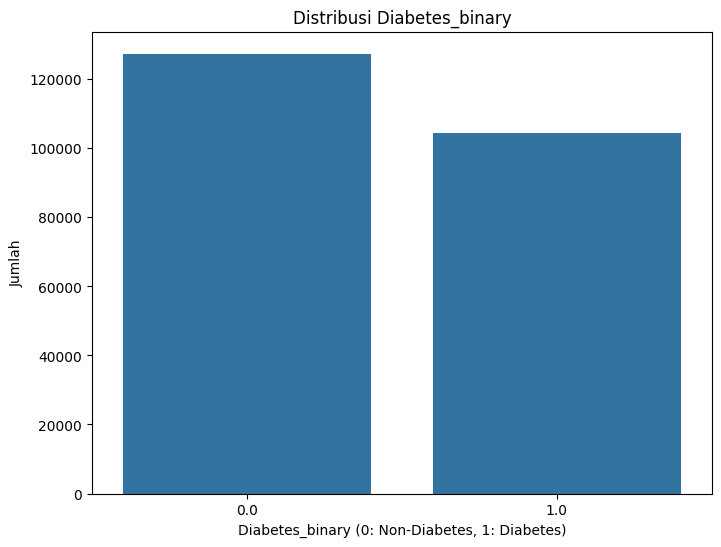

In [ ]:
# Visualisasi fitur 'Diabetes_binary' dengan nilai 1 dan 0
plt.figure(figsize=(8, 6))
sns.countplot(x='Diabetes_binary', data=df)
plt.title('Distribusi Diabetes_binary')
plt.xlabel('Diabetes_binary (0: Non-Diabetes, 1: Diabetes)')
plt.ylabel('Jumlah')
plt.show()

<ipython-input-265-d57c07d0f7d0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='HighBP', data=df, palette='Blues')


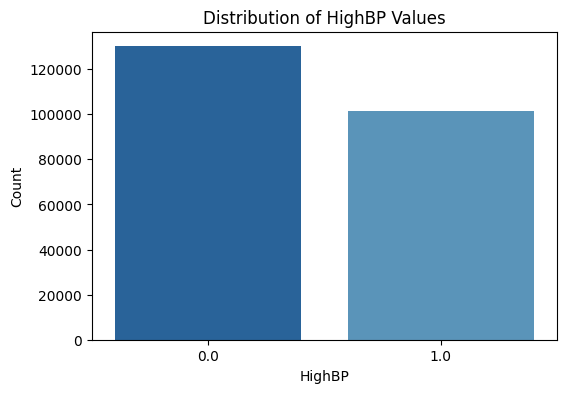

In [ ]:
# Visualize 'HighBP' with a bar chart
plt.figure(figsize=(6, 4))
sns.countplot(x='HighBP', data=df, palette='Blues')
plt.title('Distribution of HighBP Values')
plt.xlabel('HighBP')
plt.ylabel('Count')
plt.show()

<ipython-input-264-8fa740e268ea>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='HighChol', data=df, palette='Blues')


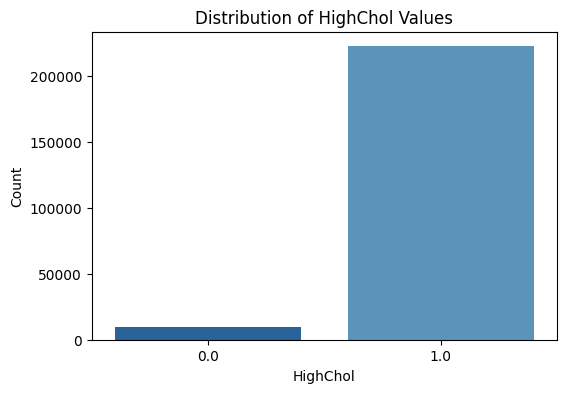

In [ ]:
# Visualize 'HighChol' with a bar chart
plt.figure(figsize=(6, 4))
sns.countplot(x='HighChol', data=df, palette='Blues')
plt.title('Distribution of HighChol Values')
plt.xlabel('HighChol')
plt.ylabel('Count')
plt.show()

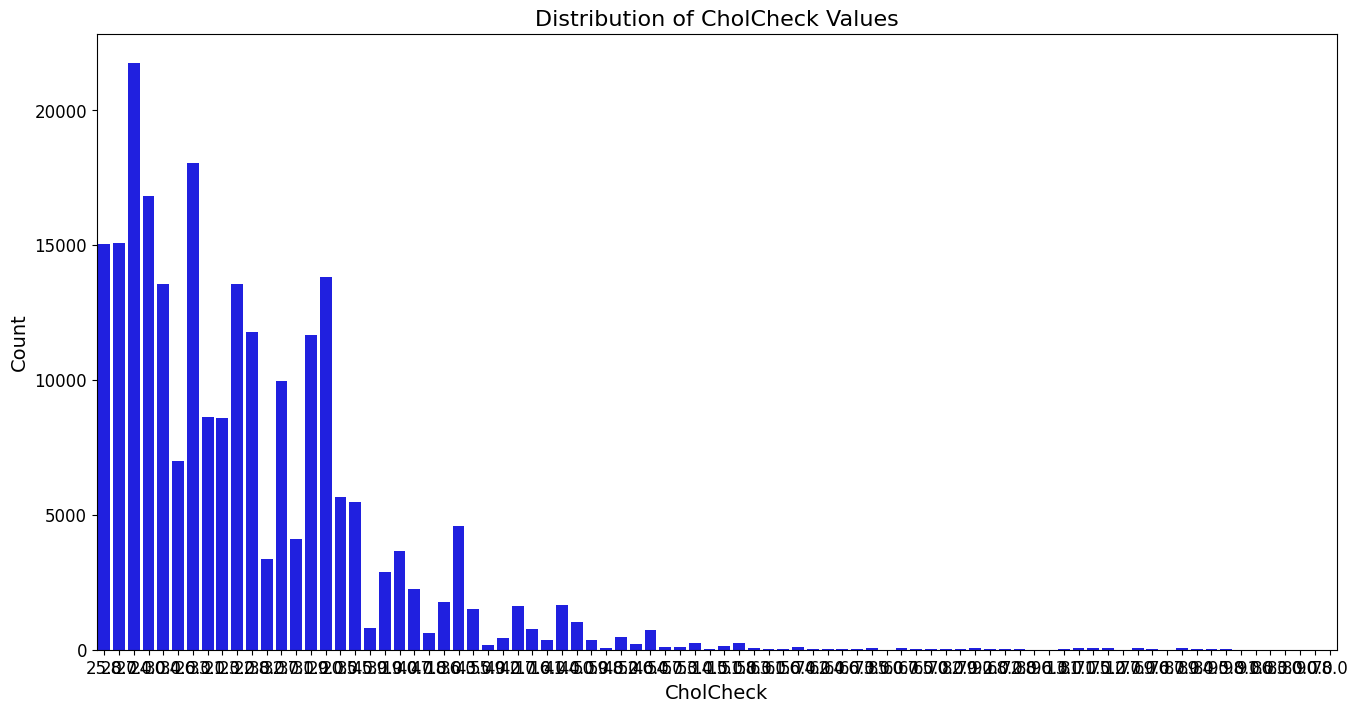

In [ ]:

plt.figure(figsize=(16, 8))  # Increased figure size for better visualization
sns.countplot(x='CholCheck', data=df, color='blue') # Set color to blue
plt.title('Distribution of CholCheck Values', fontsize=16) # Increased font size for title
plt.xlabel('CholCheck', fontsize=14) # Increased font size for x-axis label
plt.ylabel('Count', fontsize=14) # Increased font size for y-axis label
plt.xticks(fontsize=12) # Increased font size for x-axis ticks
plt.yticks(fontsize=12) # Increased font size for y-axis ticks
plt.show()

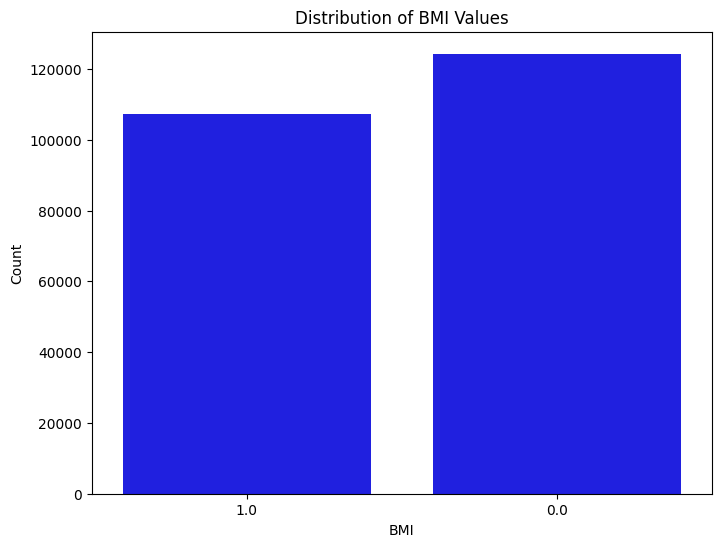

In [ ]:
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
sns.countplot(x='BMI', data=df, color='blue')
plt.title('Distribution of BMI Values')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.show()

<ipython-input-272-f20b83b1f45e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Smoker', data=df, palette='Blues')


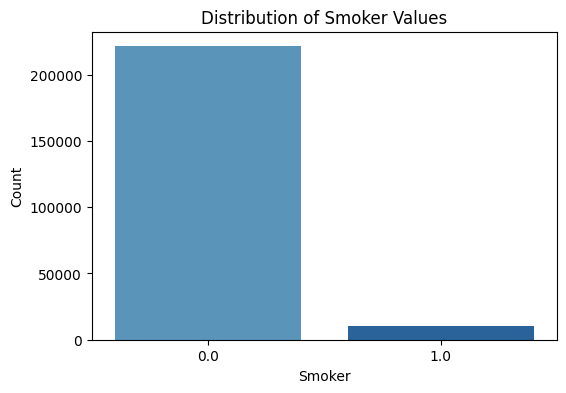

In [ ]:
# Visualize 'Smoker' with a bar chart
plt.figure(figsize=(6, 4))
sns.countplot(x='Smoker', data=df, palette='Blues')
plt.title('Distribution of Smoker Values')
plt.xlabel('Smoker')
plt.ylabel('Count')
plt.show()

<ipython-input-273-9bb770fb962a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Stroke', data=df, palette='Blues')


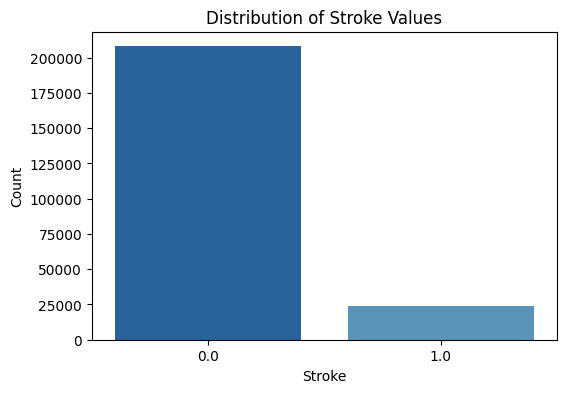

In [ ]:
# Visualize 'Stroke' with a bar chart
plt.figure(figsize=(6, 4))
sns.countplot(x='Stroke', data=df, palette='Blues')
plt.title('Distribution of Stroke Values')
plt.xlabel('Stroke')
plt.ylabel('Count')
plt.show()

<ipython-input-274-0fa3153ae3d7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='HeartDiseaseorAttack', data=df, palette='Blues')


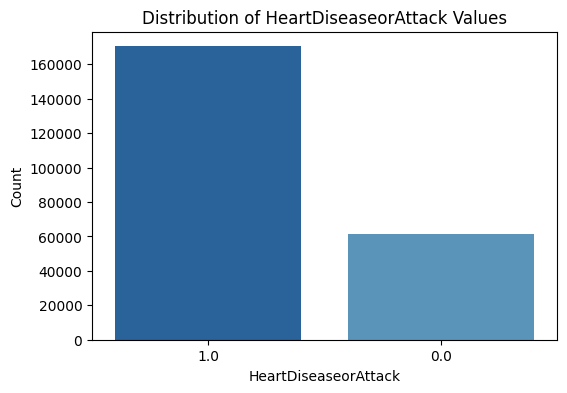

In [ ]:
# Visualize 'HeartDiseaseorAttack' with a bar chart
plt.figure(figsize=(6, 4))
sns.countplot(x='HeartDiseaseorAttack', data=df, palette='Blues')
plt.title('Distribution of HeartDiseaseorAttack Values')
plt.xlabel('HeartDiseaseorAttack')
plt.ylabel('Count')
plt.show()

<ipython-input-277-34b42b2689ce>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='PhysActivity', data=df, palette='Blues')


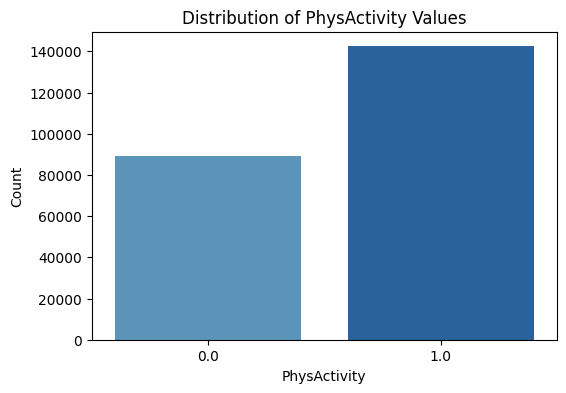

In [ ]:

# Visualize 'PhysActivity' with a bar chart
plt.figure(figsize=(6, 4))
sns.countplot(x='PhysActivity', data=df, palette='Blues')
plt.title('Distribution of PhysActivity Values')
plt.xlabel('PhysActivity')
plt.ylabel('Count')
plt.show()

<ipython-input-278-18a4c404230e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Fruits', data=df, palette='Blues')


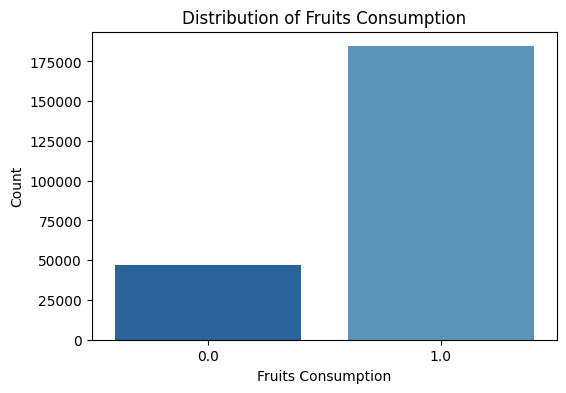

In [ ]:

# Visualize 'Fruits' with a bar chart
plt.figure(figsize=(6, 4))
sns.countplot(x='Fruits', data=df, palette='Blues')
plt.title('Distribution of Fruits Consumption')
plt.xlabel('Fruits Consumption')
plt.ylabel('Count')
plt.show()

<ipython-input-279-bde63609d008>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Veggies', data=df, palette='Blues')


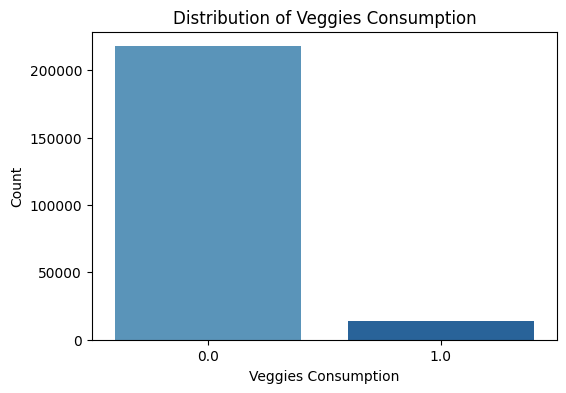

In [ ]:

# Visualize 'Veggies' with a bar chart
plt.figure(figsize=(6, 4))
sns.countplot(x='Veggies', data=df, palette='Blues')
plt.title('Distribution of Veggies Consumption')
plt.xlabel('Veggies Consumption')
plt.ylabel('Count')
plt.show()

<ipython-input-280-ddbef754818c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='HvyAlcoholConsump', data=df, palette='Blues')


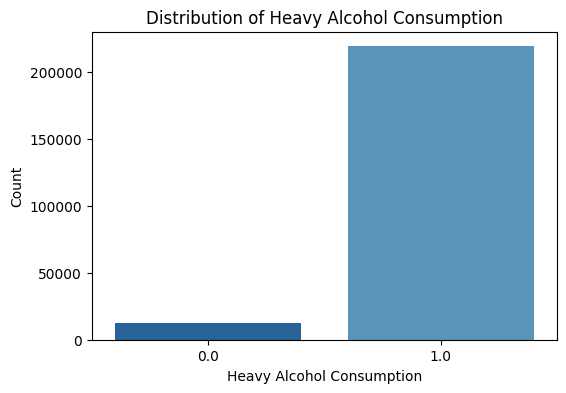

In [ ]:
# Visualize 'HvyAlcoholConsump' with a bar chart
plt.figure(figsize=(6, 4))
sns.countplot(x='HvyAlcoholConsump', data=df, palette='Blues')
plt.title('Distribution of Heavy Alcohol Consumption')
plt.xlabel('Heavy Alcohol Consumption')
plt.ylabel('Count')
plt.show()

<ipython-input-281-9d2867e7502c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='AnyHealthcare', data=df, palette='Blues')


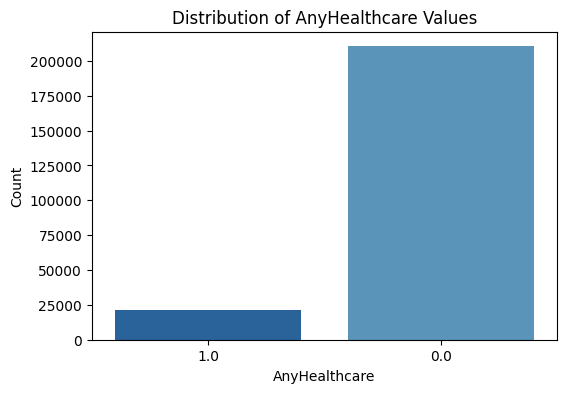

In [ ]:

# Visualize 'AnyHealthcare' with a bar chart
plt.figure(figsize=(6, 4))
sns.countplot(x='AnyHealthcare', data=df, palette='Blues')
plt.title('Distribution of AnyHealthcare Values')
plt.xlabel('AnyHealthcare')
plt.ylabel('Count')
plt.show()

<ipython-input-282-afe3fa8ffe53>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='NoDocbcCost', data=df, palette='Blues')


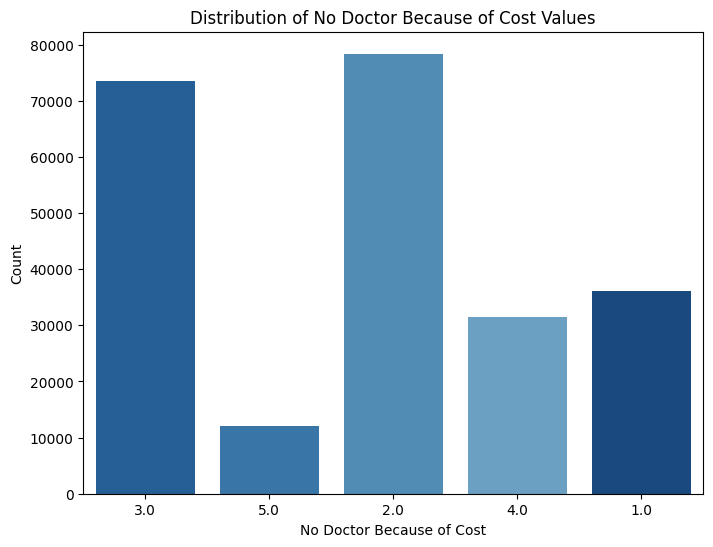

In [ ]:

# Visualize 'NoDocbcCost' with a bar chart
plt.figure(figsize=(8, 6))
sns.countplot(x='NoDocbcCost', data=df, palette='Blues')
plt.title('Distribution of No Doctor Because of Cost Values')
plt.xlabel('No Doctor Because of Cost')
plt.ylabel('Count')
plt.show()

<ipython-input-283-c95f3685c0e0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='GenHlth', data=df, palette='Blues')


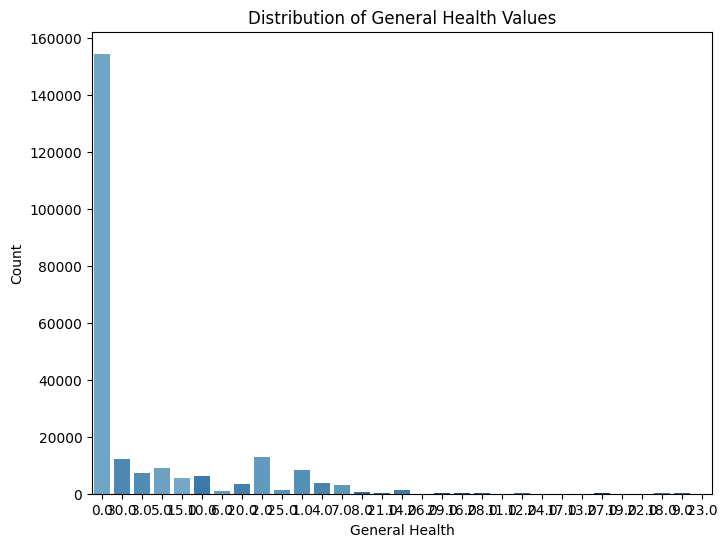

In [ ]:
# Visualize 'GenHlth' with a bar chart
plt.figure(figsize=(8, 6))
sns.countplot(x='GenHlth', data=df, palette='Blues')
plt.title('Distribution of General Health Values')
plt.xlabel('General Health')
plt.ylabel('Count')
plt.show()

<ipython-input-284-2b5b6163e802>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='MentHlth', data=df, palette='Blues')


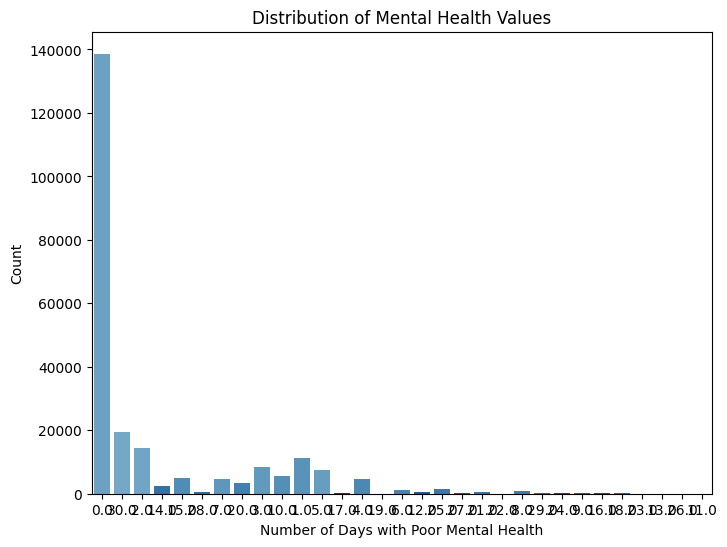

In [ ]:
# Visualize 'MentHlth' with a bar chart
plt.figure(figsize=(8, 6))
sns.countplot(x='MentHlth', data=df, palette='Blues')
plt.title('Distribution of Mental Health Values')
plt.xlabel('Number of Days with Poor Mental Health')
plt.ylabel('Count')
plt.show()

<ipython-input-285-3239bedb34d8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='PhysHlth', data=df, palette='Blues')


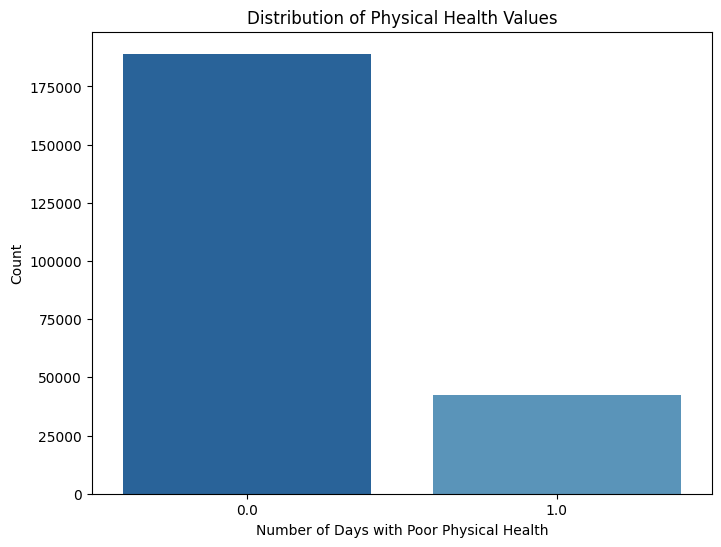

In [ ]:
# Visualize 'PhysHlth' with a bar chart
plt.figure(figsize=(8, 6))
sns.countplot(x='PhysHlth', data=df, palette='Blues')
plt.title('Distribution of Physical Health Values')
plt.xlabel('Number of Days with Poor Physical Health')
plt.ylabel('Count')
plt.show()

<ipython-input-286-6564dedbc69a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='DiffWalk', data=df, palette='Blues')


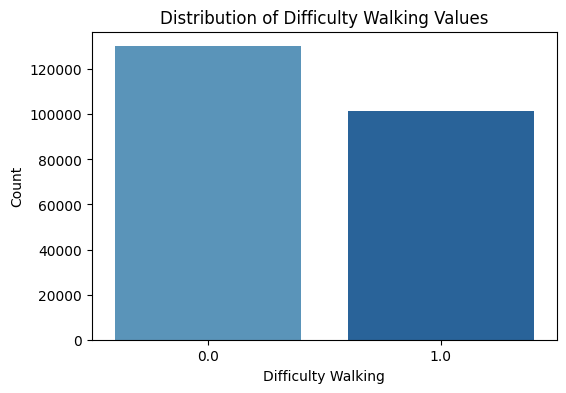

In [ ]:
# Visualize 'DiffWalk' with a bar chart
plt.figure(figsize=(6, 4))
sns.countplot(x='DiffWalk', data=df, palette='Blues')
plt.title('Distribution of Difficulty Walking Values')
plt.xlabel('Difficulty Walking')
plt.ylabel('Count')
plt.show()

<ipython-input-287-052e4a5f92a3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sex', data=df, palette='Blues')


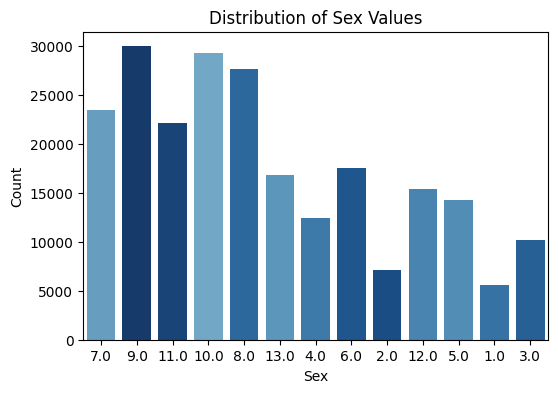

In [ ]:
# Visualize 'Sex' with a bar chart
plt.figure(figsize=(6, 4))
sns.countplot(x='Sex', data=df, palette='Blues')
plt.title('Distribution of Sex Values')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

<ipython-input-290-aaf4e355f4c7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Age', data=df, palette='Blues')


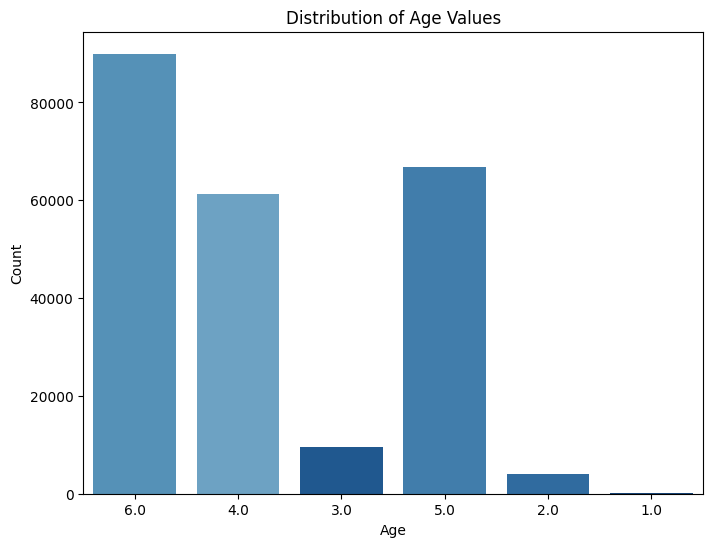

In [ ]:
# Visualize 'Age' with a bar chart
plt.figure(figsize=(8, 6))
sns.countplot(x='Age', data=df, palette='Blues')
plt.title('Distribution of Age Values')
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability if needed
plt.show()

<ipython-input-291-902f5e8e52d5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Education', data=df, palette='Blues')


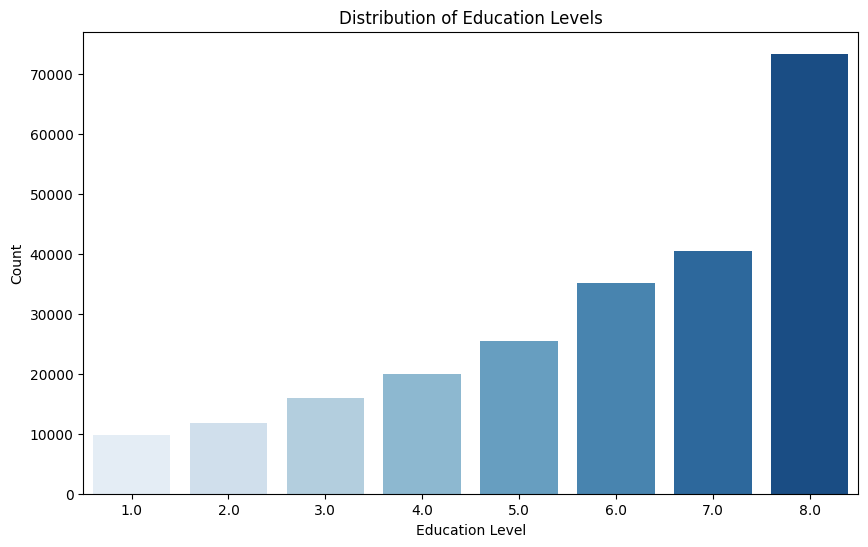

In [ ]:
# Visualize 'Education' with a countplot
plt.figure(figsize=(10, 6))
sns.countplot(x='Education', data=df, palette='Blues')
plt.title('Distribution of Education Levels')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253681 entries, 0 to 253680
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253681 non-null  object 
 1   HighBP                253681 non-null  object 
 2   HighChol              253681 non-null  object 
 3   CholCheck             253681 non-null  object 
 4   BMI                   253681 non-null  object 
 5   Smoker                253681 non-null  object 
 6   Stroke                253681 non-null  object 
 7   HeartDiseaseorAttack  253681 non-null  object 
 8   PhysActivity          253681 non-null  object 
 9   Fruits                253681 non-null  object 
 10  Veggies               253681 non-null  object 
 11  HvyAlcoholConsump     253681 non-null  object 
 12  AnyHealthcare         253681 non-null  object 
 13  NoDocbcCost           253681 non-null  object 
 14  GenHlth               253681 non-null  object 
 15  

### Cek fitur yang bertipe categorikal

In [ ]:
# Cek fitur yang bertipe kategorikal dalam DataFrame
categorical_features = df.select_dtypes(include=['object', 'category']).columns.tolist()
categorical_features


['Diabetes_binary',
 'HighBP',
 'HighChol',
 'CholCheck',
 'BMI',
 'Smoker',
 'Stroke',
 'HeartDiseaseorAttack',
 'PhysActivity',
 'Fruits',
 'Veggies',
 'HvyAlcoholConsump',
 'AnyHealthcare',
 'NoDocbcCost',
 'GenHlth',
 'MentHlth',
 'PhysHlth',
 'DiffWalk',
 'Sex',
 'Age']

### Koversi Nilai Kategorikal Menjadi Ordinal

In [ ]:
# prompt: konversi nilai berkategorikal menjadi ordinal

# Mapping for ordinal conversion
ordinal_mapping = {
    'GenHlth': {1: 1, 2: 2, 3: 3, 4: 4, 5: 5},
    'Education': {1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6:6},
    # Add other features and mappings as needed
}

# Convert categorical features to ordinal
for feature, mapping in ordinal_mapping.items():
    if feature in df.columns:
        df[feature] = df[feature].map(mapping)

# Now check the data types to make sure the conversion was successful
df.dtypes

,0
Diabetes_binary,object
HighBP,object
HighChol,object
CholCheck,object
BMI,object
Smoker,object
Stroke,object
HeartDiseaseorAttack,object
PhysActivity,object
Fruits,object


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253681 entries, 0 to 253680
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253681 non-null  object 
 1   HighBP                253681 non-null  object 
 2   HighChol              253681 non-null  object 
 3   CholCheck             253681 non-null  object 
 4   BMI                   253681 non-null  object 
 5   Smoker                253681 non-null  object 
 6   Stroke                253681 non-null  object 
 7   HeartDiseaseorAttack  253681 non-null  object 
 8   PhysActivity          253681 non-null  object 
 9   Fruits                253681 non-null  object 
 10  Veggies               253681 non-null  object 
 11  HvyAlcoholConsump     253681 non-null  object 
 12  AnyHealthcare         253681 non-null  object 
 13  NoDocbcCost           253681 non-null  object 
 14  GenHlth               253681 non-null  object 
 15  

### CEk Korelasi

Fitur kategorikal: ['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education']
Tipe data untuk Diabetes_binary: object
Tipe data untuk HighBP: object
Tipe data untuk HighChol: object
Tipe data untuk CholCheck: object
Tipe data untuk BMI: object
Tipe data untuk Smoker: object
Tipe data untuk Stroke: object
Tipe data untuk HeartDiseaseorAttack: object
Tipe data untuk PhysActivity: object
Tipe data untuk Fruits: object
Tipe data untuk Veggies: object
Tipe data untuk HvyAlcoholConsump: object
Tipe data untuk AnyHealthcare: object
Tipe data untuk NoDocbcCost: object
Tipe data untuk GenHlth: object
Tipe data untuk MentHlth: object
Tipe data untuk PhysHlth: object
Tipe data untuk DiffWalk: object
Tipe data untuk Sex: object
Tipe data untuk Age: object
Tipe data untuk Education: object
 

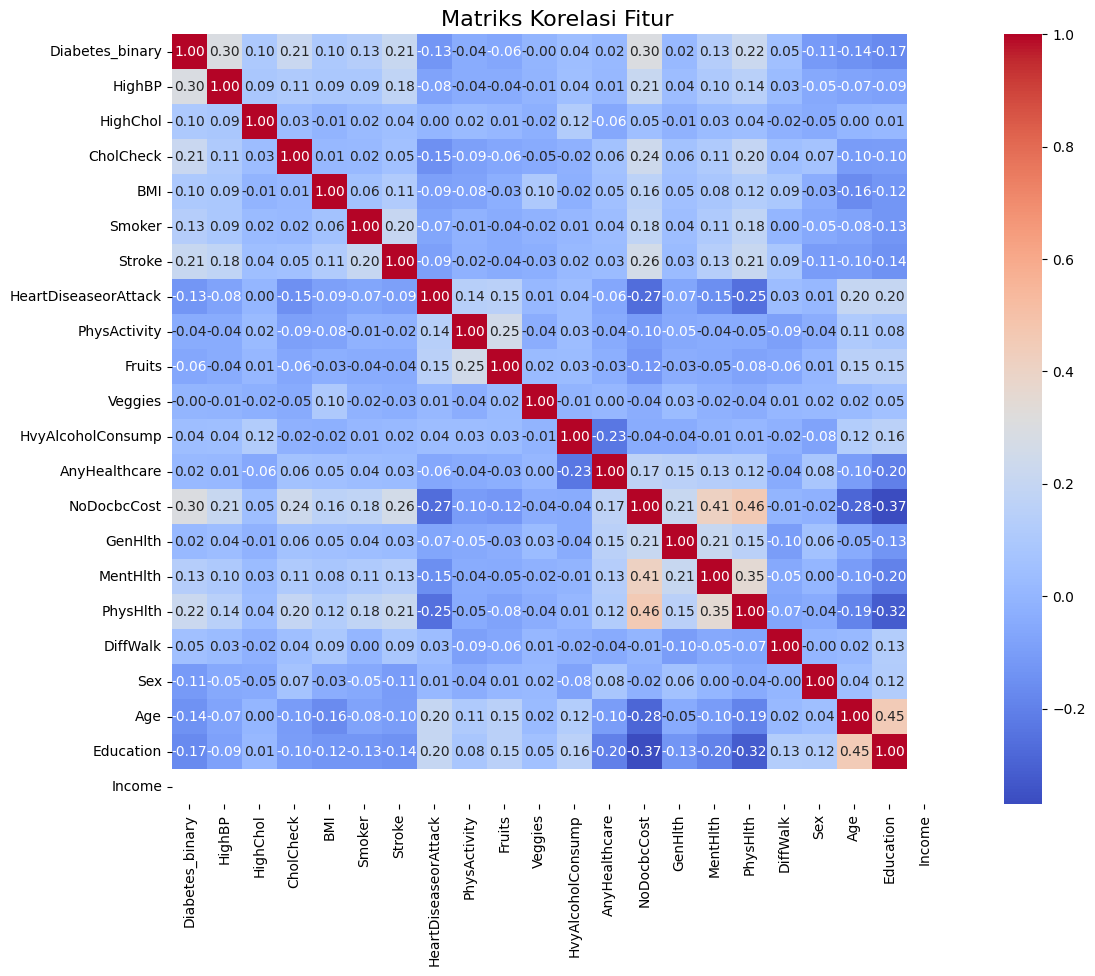

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder

# Cek fitur yang bertipe kategorikal dalam DataFrame
categorical_features = df.select_dtypes(include=['object', 'category']).columns.tolist()
print("Fitur kategorikal:", categorical_features)

# Periksa tipe data di setiap kolom kategorikal
for feature in categorical_features:
    print(f"Tipe data untuk {feature}: {df[feature].dtype}")

# Mengonversi semua kolom kategorikal menjadi string
for feature in categorical_features:
    df[feature] = df[feature].astype(str)

# Gunakan OrdinalEncoder untuk mengonversi kolom kategorikal menjadi numerik
ordinal_encoder = OrdinalEncoder()
df[categorical_features] = ordinal_encoder.fit_transform(df[categorical_features])

# Hitung matriks korelasi
correlation_matrix = df.corr()

# Menampilkan matriks korelasi
print(correlation_matrix)

# Membuat heatmap untuk visualisasi
plt.figure(figsize=(16, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar=True)

# Menambahkan judul
plt.title('Matriks Korelasi Fitur', fontsize=16)
plt.show()


### Split Data Testing Dan Training

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# Ganti nilai '2.0' dengan NaN
df.loc[df['Diabetes_binary'] == '2.0', 'Diabetes_binary'] = np.nan

# Konversi kolom menjadi float
df['Diabetes_binary'] = df['Diabetes_binary'].astype(float)

# Hapus baris yang mengandung NaN
df = df.dropna(subset=['Diabetes_binary'])

# Ganti nilai 0.0 dan 1.0 dengan 0 dan 1
df.loc[df['Diabetes_binary'] == 0.0, 'Diabetes_binary'] = 0
df.loc[df['Diabetes_binary'] == 1.0, 'Diabetes_binary'] = 1

# Pastikan semua nilai di dalam kolom adalah integer
df['Diabetes_binary'] = df['Diabetes_binary'].astype(int)

# Cek distribusi kelas
class_counts = df['Diabetes_binary'].value_counts()
print("Distribusi kelas:\n", class_counts)

# Menghapus kelas dengan sedikit contoh
if any(class_counts < 2):
    # Ambil kelas yang memiliki sedikit anggota
    rare_classes = class_counts[class_counts < 2].index.tolist()
    # Hapus baris dengan kelas jarang
    df = df[~df['Diabetes_binary'].isin(rare_classes)]

# Pisahkan fitur dan target
X = df.drop('Diabetes_binary', axis=1)  # Menghapus kolom 'Diabetes_binary' untuk mendapatkan fitur
y = df['Diabetes_binary']  # Mengambil kolom 'Diabetes_binary' sebagai target

# Bagi data menjadi training dan testing dengan rasio 90:10
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)

# Menampilkan ukuran data
print(f"Ukuran data training: {X_train.shape[0]} dan ukuran data testing: {X_test.shape[0]}")


Distribusi kelas:
 Diabetes_binary
0    144851
1    108829
2         1
Name: count, dtype: int64
Ukuran data training: 228312 dan ukuran data testing: 25368


In [ ]:
# Menghapus baris dengan nilai '2' dari kolom 'Diabetes_binary'
df = df[df['Diabetes_binary'] != 2]

# Pastikan untuk mengupdate kembali target 'y' setelah penghapusan
y = df['Diabetes_binary']  # Ambil kolom 'Diabetes_binary' sebagai target
X = df.drop('Diabetes_binary', axis=1)  # Menghapus kolom 'Diabetes_binary' untuk mendapatkan fitur

# Bagi data menjadi training dan testing dengan rasio 90:10
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)

# Menampilkan ukuran data
print(f"Ukuran data training: {X_train.shape[0]} dan ukuran data testing: {X_test.shape[0]}")


Ukuran data training: 228312 dan ukuran data testing: 25368


### MEncari Paramater Optimal dengan Decision Tree

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Memuat dataset (asumsi sudah dilakukan sebelumnya)

# Preprocessing data (asumsi sudah dilakukan sebelumnya)
# Ganti nilai '2.0' dengan NaN dan proses lainnya

# Pisahkan fitur dan target
X = df.drop('Diabetes_binary', axis=1)
y = df['Diabetes_binary']

# Bagi data menjadi training dan testing dengan rasio 90:10
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)

# Inisialisasi model Decision Tree
dtree = DecisionTreeClassifier(random_state=42)

# Definisikan parameter yang ingin dicoba
param_grid = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Setup GridSearchCV
grid_search = GridSearchCV(estimator=dtree,
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=5,
                           n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Tampilkan parameter terbaik dan akurasi
print("Parameter terbaik:", grid_search.best_params_)
print("Akurasi terbaik:", grid_search.best_score_)

# Buat model dengan parameter terbaik
best_model = grid_search.best_estimator_

# Evaluasi model pada data testing
test_accuracy = best_model.score(X_test, y_test)
print("Akurasi model pada data testing:", test_accuracy)


Parameter terbaik: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2}
Akurasi terbaik: 0.7181006585416381
Akurasi model pada data testing: 0.7194891201513718


Parameter terbaik yang ditemukan untuk model adalah:

- **max_depth**: 10 — ini berarti pohon keputusan dapat memiliki kedalaman maksimum 10 lapisan.
- **min_samples_leaf**: 4 — ini menunjukkan bahwa setiap daun pada pohon harus memiliki minimal 4 sampel data.
- **min_samples_split**: 2 — ini berarti bahwa untuk membagi node, minimal harus ada 2 sampel.

Akurasi terbaik yang dicapai saat pelatihan model adalah **71.81%**, yang menunjukkan seberapa baik model memprediksi kelas pada data pelatihan.

Akurasi model pada data pengujian adalah **71.95%**, yang menunjukkan bahwa model dapat mempertahankan kinerja yang hampir sama saat diterapkan pada data baru yang tidak terlihat sebelumnya. Ini menunjukkan bahwa model tidak terlalu overfit dan dapat digeneralisasi dengan baik.

### Confusion Matrix

In [ ]:
# Hitung jumlah setiap kelas
class_counts = df['Diabetes_binary'].value_counts()
print(class_counts)


Diabetes_binary
0    144851
1    108829
Name: count, dtype: int64


In [ ]:
import pandas as pd

# Misalkan df adalah DataFrame Anda
# Contoh data untuk kolom Diabetes_binary
data = {'Diabetes_binary': [0]*193490 + [1]*4629 + [2]*30716}
df = pd.DataFrame(data)

# 1. Hapus baris dengan Diabetes_binary = 1
df = df[df['Diabetes_binary'] != 1]

# 2. Ganti nilai 2 menjadi 1
df['Diabetes_binary'] = df['Diabetes_binary'].replace({2: 1})

# Cek hasil
print(df['Diabetes_binary'].value_counts())


Diabetes_binary
0    193490
1     30716
Name: count, dtype: int64


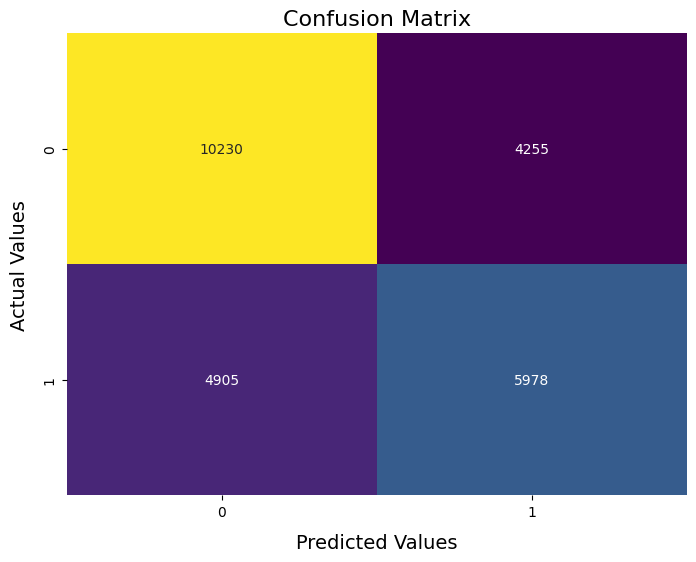

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier # Import DecisionTreeClassifier

# Assuming X_train and y_train are your training data
# Create and train the decision tree model
best_dt = DecisionTreeClassifier()  # Initialize the model
best_dt.fit(X_train, y_train)  # Train the model using your training data

# Now you can use best_dt for predictions
y_pred = best_dt.predict(X_test)

# Buat confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])

# Visualisasi confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='viridis', fmt='.0f', cbar=False,
            xticklabels=['0', '1'],
            yticklabels=['0', '1'])
plt.xlabel('Predicted Values', fontdict={'size': 14}, labelpad=10)
plt.ylabel('Actual Values', fontdict={'size': 14}, labelpad=10)
plt.title('Confusion Matrix', fontdict={'size': 16})
plt.show()